In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


In [22]:
rand_seed = 789456 #do not change this random seed anytime.
test_participant = 19

In [23]:
data = pd.read_csv('../Collected Data/preprocessed_IMU/traindata/preprocessed_traindata'+str(test_participant)+'.csv')

X = data.drop('Label', axis=1) #features
y = data['Label']
y = y.str.strip()
len(X)
X.tail()


,avg_accX,min_accX,max_accX,var_accX,std_accX,avg_accY,min_accY,max_accY,var_accY,std_accY,avg_accZ,min_accZ,max_accZ,var_accZ,std_accZ,avg_magnitude,min_magnitude,max_magnitude,var_magnitude,std_magnitude
3398,-0.658329,-1.619629,0.076416,0.183988,0.428402,0.209648,-0.152710,0.492310,0.013309,0.115222,-0.656887,-1.084717,-0.335327,0.049904,0.223113,1.060992,0.736366,1.769853,0.029804,0.172424
3399,-0.794911,-1.521851,-0.292725,0.036870,0.191774,0.005782,-0.504150,0.380005,0.027008,0.164135,-0.617697,-0.994263,-0.289185,0.017884,0.133563,1.033789,0.638173,1.687374,0.026369,0.162181
3400,-0.893557,-1.715576,-0.104736,0.060017,0.244678,0.161675,-0.044678,0.468994,0.012094,0.109837,-0.535932,-0.899292,-0.323975,0.013180,0.114659,1.072168,0.512569,1.944697,0.047459,0.217579
3401,-0.809971,-1.554565,-0.175537,0.073450,0.270678,0.082148,-0.605957,0.537964,0.037936,0.194528,-0.595869,-1.248779,-0.187256,0.048775,0.220574,1.057722,0.581143,1.697793,0.058993,0.242582
3402,-0.816060,-1.334839,-0.460693,0.032082,0.178889,0.068148,-0.305542,0.486938,0.020173,0.141855,-0.596738,-0.985596,-0.160278,0.023769,0.153979,1.034486,0.557174,1.563537,0.032447,0.179906


In [24]:
label_encoder = LabelEncoder()

encoded_traininglabels = label_encoder.fit_transform(y)

print("Encoded Labels:", encoded_traininglabels)

Encoded Labels: [0 0 0 ... 3 3 3]


In [25]:
label_mapping = dict(zip(encoded_traininglabels, y))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'Null', 1: 'lift down', 3: 'stairs down', 4: 'stairs up', 2: 'lift up'}


In [26]:
y = encoded_traininglabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y).items()))

[(0, 1361), (1, 160), (2, 171), (3, 488), (4, 542)]
[(0, 1683), (1, 202), (2, 213), (3, 611), (4, 694)]


In [28]:
Xtrain_resampled, ytrain_resampled = RandomOverSampler(sampling_strategy= "not majority", random_state=rand_seed).fit_resample(X_train, y_train)
print (sorted(Counter(ytrain_resampled).items())) 

X_resampled, y_resampled = RandomOverSampler(sampling_strategy= "not majority", random_state=rand_seed).fit_resample(X, y)
print (sorted(Counter(y_resampled).items()))

[(0, 1361), (1, 1361), (2, 1361), (3, 1361), (4, 1361)]
[(0, 1683), (1, 1683), (2, 1683), (3, 1683), (4, 1683)]


In [29]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 225, 250, 275, 300, 325, 350],  # Testing different values for n_estimators
    'max_depth': [None,5, 10, 15, 20],       # Testing different values for max_depth
}

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=rand_seed)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_resampled, y_resampled)

# Get the best model and best parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Extract and plot mean validation scores
mean_scores = grid_search.cv_results_['mean_test_score']
params_n_estimators = [param['n_estimators'] for param in grid_search.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(params_n_estimators, mean_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Validation Accuracy')
plt.title('Validation Curve for n_estimators')
plt.grid(True)
plt.show()


In [30]:
# Training the model using the best parameters
final_rf = RandomForestClassifier(max_depth=20,n_estimators=275, random_state=rand_seed)
final_rf.fit(X_resampled, y_resampled) #use xtrain_resampled & ytrain_resampled for training accuracy. x_resampled and y_resampled for testing accuracy

RandomForestClassifier(max_depth=20, n_estimators=275, random_state=789456)

In [31]:
data = pd.read_csv('../Collected Data/preprocessed_IMU/preprocessed_data'+str(test_participant)+'.csv')

xtest = data.drop('Label', axis=1) #features
ytest = data['Label'].str.strip()


In [32]:
encoded_testinglabels = label_encoder.fit_transform(ytest)
label_mapping = dict(zip(encoded_testinglabels, ytest))
print("Label Mapping:", label_mapping)
print(encoded_testinglabels)

Label Mapping: {0: 'Null', 4: 'stairs up', 3: 'stairs down', 2: 'lift up', 1: 'lift down'}
[0 0 4 0 0 3 3 3 3 3 3 0 4 4 4 4 0 0 0 0 2 2 0 0 3 3 3 3 3 3 3 3 3 3 0 0 0
 2 2 2 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 2 2 0 0 4 4 4 4 4 4 4 0 0 0 0 0 0 1 1
 1 0 0 0 0 2 2 2 2 0 0 0 0 1 1 1 0 0 0 3 3 3 3 3 3 3 3 3 0 0 0 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3
 3 3 3 3 3 0 4 4 0 0 3 3 3 3 0 0 0 4 4]


In [33]:
y_pred = final_rf.predict(xtest)
ytest = encoded_testinglabels
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)
f1_micro = f1_score(ytest, y_pred, average='micro')
f1_macro = f1_score(ytest, y_pred, average='macro')
f1_weighted = f1_score(ytest, y_pred, average='weighted')
print("F1 Score micro:", f1_micro)
print("F1 Score macro:", f1_macro)
print("F1 Score weighted:", f1_weighted)

Accuracy: 0.7647058823529411
F1 Score micro: 0.7647058823529411
F1 Score macro: 0.6034477945625196
F1 Score weighted: 0.7615841996364311


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
import numpy as np
cm = confusion_matrix(ytest, y_pred,  labels=np.arange(len(label_encoder.classes_)))

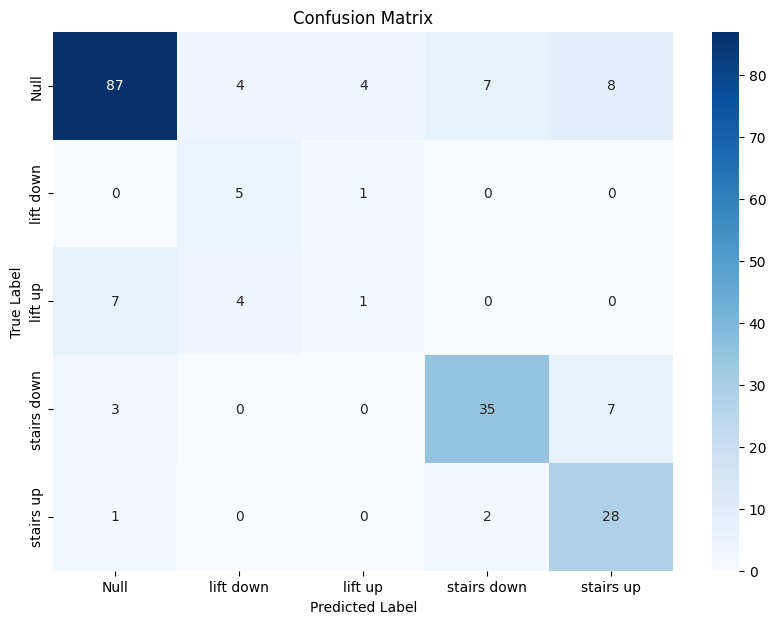

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
importances = final_rf.feature_importances_
importances = list(map(lambda x: str(x), importances))
print(",".join(importances))

0.0408114204319467,0.05196607350620144,0.045215252429178295,0.05348647721395923,0.05204078523042,0.03633963653640023,0.039150292345713426,0.03999183851836064,0.034439683078982146,0.034114189406940346,0.03746721105348763,0.036650274590591614,0.034397845067541996,0.04186038195123025,0.041864473524925484,0.04153965345876523,0.06303689998072325,0.07665760743919803,0.09550459284039695,0.10346541139503715


In [21]:
feature_importances = feature_importances.set_index('Feature')

# Print the transposed DataFrame
print(feature_importances)


NameError: name 'feature_importances' is not defined